<a href="https://colab.research.google.com/github/Tarane2028/ADS-599-Capstone-Project/blob/main/EDA_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3015890670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis Complete Date'] = pd.to_datetime(df['Analysis Complete Date'])


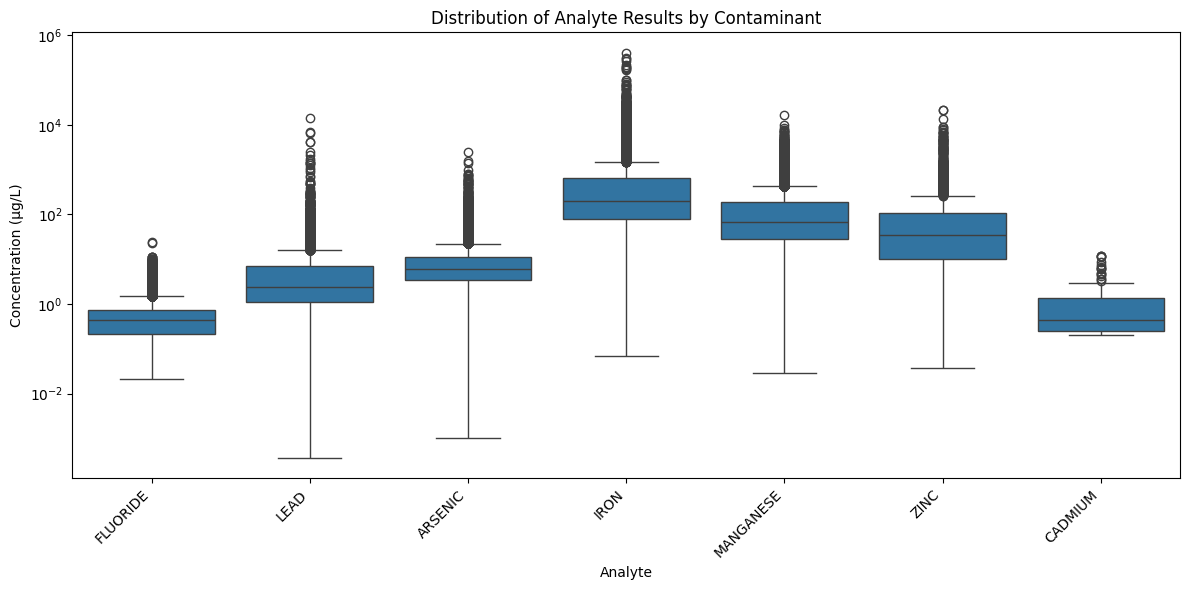

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/ADS Capstone/Final.xlsx')

# 2. Clean: remove duplicates and missing critical fields
df = df.drop_duplicates()
df = df.dropna(subset=['Analysis Complete Date', 'Analyte Name', 'Result'])

# 3. Ensure the date column is datetime
df['Analysis Complete Date'] = pd.to_datetime(df['Analysis Complete Date'])

# 4. Create a boxplot of analyte concentrations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Analyte Name', y='Result')
plt.yscale('log')  # log scale to handle skew
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Analyte Results by Contaminant')
plt.xlabel('Analyte')
plt.ylabel('Concentration (µg/L)')
plt.tight_layout()
plt.show()


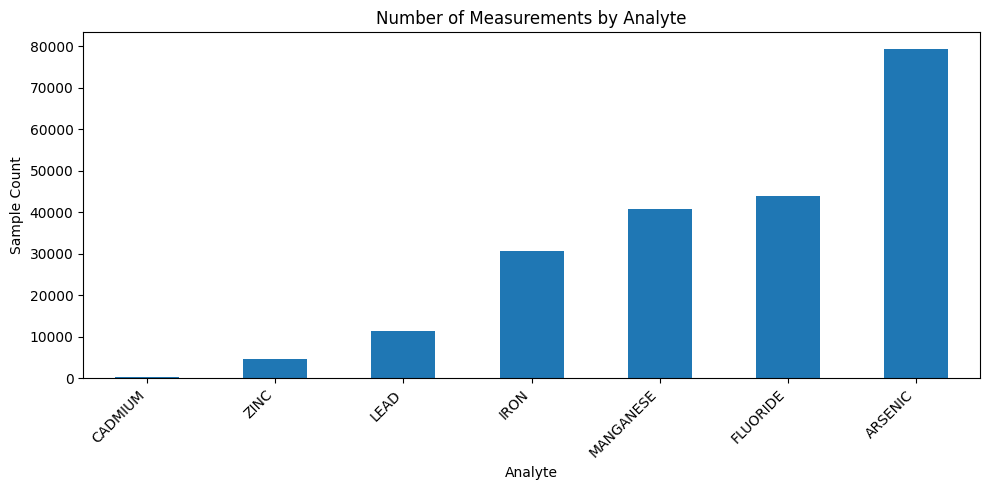

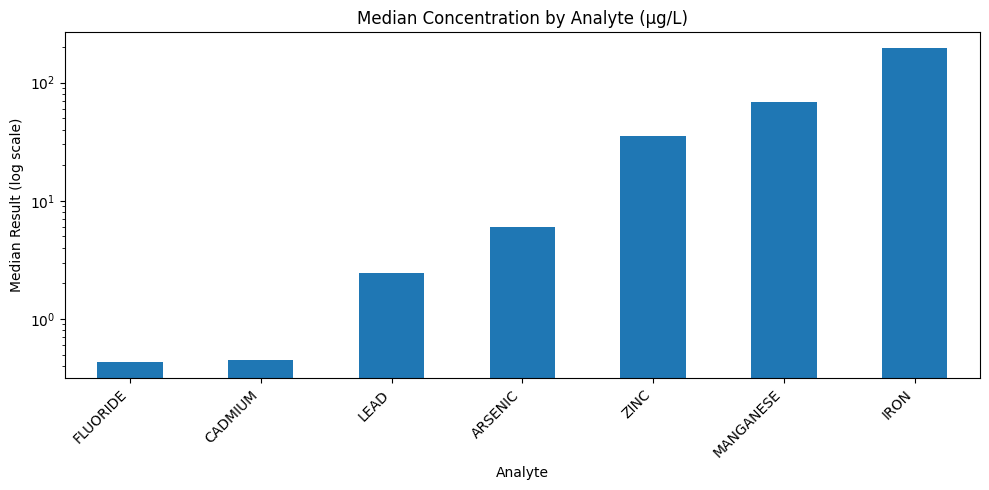

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Analysis Complete Date'] = pd.to_datetime(df['Analysis Complete Date'])

# 2a. Bar‐chart of sample counts per analyte
counts = df['Analyte Name'].value_counts().sort_values()
plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title('Number of Measurements by Analyte')
plt.xlabel('Analyte')
plt.ylabel('Sample Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2b. Bar‐chart of median concentration per analyte
medians = df.groupby('Analyte Name')['Result'].median().sort_values()
plt.figure(figsize=(10,5))
medians.plot(kind='bar')
plt.yscale('log')
plt.title('Median Concentration by Analyte (µg/L)')
plt.xlabel('Analyte')
plt.ylabel('Median Result (log scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ### 1. Actual vs. Forecast Comparison ###


plt.figure(figsize=(10, 6))
plt.plot(test_ts.index, test_ts.values, label='Actual', color='black')
plt.plot(sarimax_pred.index, sarimax_pred.values, label='SARIMAX Forecast', color='blue')
plt.fill_between(sarimax_conf.index, sarimax_conf.iloc[:,0], sarimax_conf.iloc[:,1],
                 color='blue', alpha=0.2, label='SARIMAX 95% CI')
plt.plot(prophet_pred.index, prophet_pred.values, label='Prophet Forecast', color='green')
plt.title('Actual vs. Forecasted Concentrations')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/L)')
plt.legend()
plt.show()

# ### 2. Performance Bar Chart ###
# (Use your computed MAE/RMSE values here)
metrics = {
    'SARIMAX': {'MAE': 66.0, 'RMSE': 90.5},
    'Prophet': {'MAE': 72.4, 'RMSE': 95.2}
}
df_metrics = pd.DataFrame(metrics).T

df_metrics.plot(kind='bar', figsize=(8, 5))
plt.title('Forecast Error Comparison')
plt.ylabel('Error (µg/L)')
plt.xticks(rotation=0)
plt.show()

# ### 3. Residual Analysis ###
# Compute residuals
sarimax_resid = test_ts - sarimax_pred
prophet_resid = test_ts - prophet_pred

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(sarimax_pred, sarimax_resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('SARIMAX Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
plt.scatter(prophet_pred, prophet_resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Prophet Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

# ### 4. Error Distribution ###
plt.figure(figsize=(6, 4))
plt.boxplot([sarimax_resid.dropna(), prophet_resid.dropna()], labels=['SARIMAX', 'Prophet'])
plt.title('Distribution of Forecast Errors')
plt.ylabel('Residual (µg/L)')
plt.show()

NameError: name 'test_ts' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_excel('/content/drive/MyDrive/ADS Capstone/Final.xlsx', parse_dates=date_cols)

# 1. Dataset shape and first 5 rows
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 2. Column data types
print("\nColumn data types:")
print(df.dtypes)

# 3. Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# 4. Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# 5. Correlation matrix
print("\nCorrelation matrix:")
print(df.corr())

# 6. Histograms for all numeric features
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Dataset shape: (638446, 57)

First 5 rows:
   Row #            Regulating Agency Water System #  \
0      1  DISTRICT 04 - SAN FRANCISCO      CA0103040   
1      2  DISTRICT 04 - SAN FRANCISCO      CA0103040   
2      3  DISTRICT 04 - SAN FRANCISCO      CA0103040   
3      4  DISTRICT 04 - SAN FRANCISCO      CA0103040   
4      5  DISTRICT 04 - SAN FRANCISCO      CA0103040   

                               System Status   County  Service Connections  \
0  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
1  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
2  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
3  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
4  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   

   Population TINWSYS  Population R  Population NT  ...  \
0                  50          50.0            NaN  ...   
1                  50          50

ValueError: could not convert string to float: 'DISTRICT 04 - SAN FRANCISCO'

First 5 rows:


,Row #,Regulating Agency,Water System #,System,Status,County,Service Connections,Population TINWSYS,Population R,Population NT,...,Analysis Complete Time,Analysis Method Code,Less Than Indicator,Reporting Level,Result,Units,Radiological Count Error,MCL,TRIGGER,FLAG
0,1,DISTRICT 04 - SAN FRANCISCO,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,A,ALAMEDA,19.0,50,50.0,NaN,...,19:44:00,EPA 200.8,Y,2.0,NaN,UG/L,NaN,10,5,NaN
1,2,DISTRICT 04 - SAN FRANCISCO,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,A,ALAMEDA,19.0,50,50.0,NaN,...,19:44:00,EPA 200.8,Y,1.0,NaN,UG/L,NaN,5,5,NaN
2,3,DISTRICT 04 - SAN FRANCISCO,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,A,ALAMEDA,19.0,50,50.0,NaN,...,00:19:00,EPA 300.0,N,NaN,0.16,MG/L,NaN,2,2,NaN
3,4,DISTRICT 04 - SAN FRANCISCO,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,A,ALAMEDA,19.0,50,50.0,NaN,...,19:44:00,EPA 200.8,Y,5.0,NaN,UG/L,NaN,0,15,NaN
4,5,DISTRICT 04 - SAN FRANCISCO,CA0103040,NORRIS CANYON PROPERTY OWNERS ASSN,A,ALAMEDA,19.0,50,50.0,NaN,...,14:42:00,EPA 200.7,Y,100.0,NaN,UG/L,NaN,300,300,NaN



Column Data Types:
Row #                         int64
Regulating Agency            object
Water System #               object
System                       object
Status                       object
County                       object
Service Connections         float64
Population TINWSYS            int64
Population R                float64
Population NT               float64
Population T                float64
FED Type                     object
Facility ID                  object
Facility Name                object
Facility Type                object
Treatment                    object
Availability                 object
Facility Status              object
Water Type Code              object
Filtration Status            object
D Source Flag                object
Latitude                    float64
Longitude                   float64
Sampling Point ID            object
Description                  object
Type                         object
SampPt Status                object
Note 3  

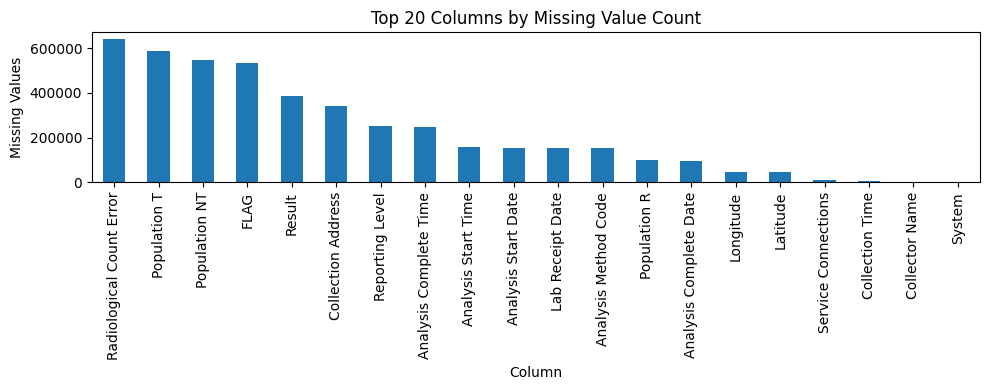


Numeric columns used for analysis:
['Row #', 'Service Connections', 'Population TINWSYS', 'Population R', 'Population NT', 'Population T', 'Latitude', 'Longitude', 'Lab ELAP Cert ID', 'Analyte Code', 'Reporting Level', 'Result', 'MCL', 'TRIGGER']


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset with date parsing
date_cols = ['Collection Date', 'Analysis Start Date', 'Analysis Complete Date', 'Lab Receipt Date']
##df = pd.read_excel('/content/drive/MyDrive/ADS Capstone/Final.xlsx', parse_dates=date_cols)
# 2. Clean column names
df.columns = df.columns.str.strip()

# 3. Display first 5 rows and dtypes
print("First 5 rows:")
display(df.head())

print("\nColumn Data Types:")
print(df.dtypes)

# 4. Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(missing)

# 5. Plot missing values counts (top 20)
plt.figure(figsize=(10, 4))
missing.head(20).plot(kind='bar')
plt.title('Top 20 Columns by Missing Value Count')
plt.xlabel('Column')
plt.ylabel('Missing Values')
plt.tight_layout()
plt.show()

# 6. Select numeric columns with at least one non-null value
numeric_cols = [
    col for col in df.select_dtypes(include='number').columns
    if df[col].notnull().sum() > 0
]
print("\nNumeric columns used for analysis:")
print(numeric_cols)

# 7. Correlation matrix for numeric columns
num_df = df[numeric_cols]
corr = num_df.corr()

# 8. Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(corr, fignum=1)
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

# 9. Histograms for numeric features
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 10. Boxplots for numeric features
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

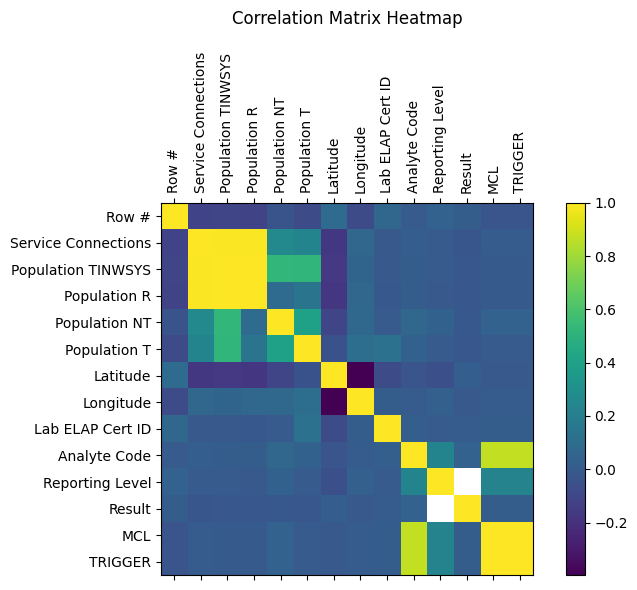

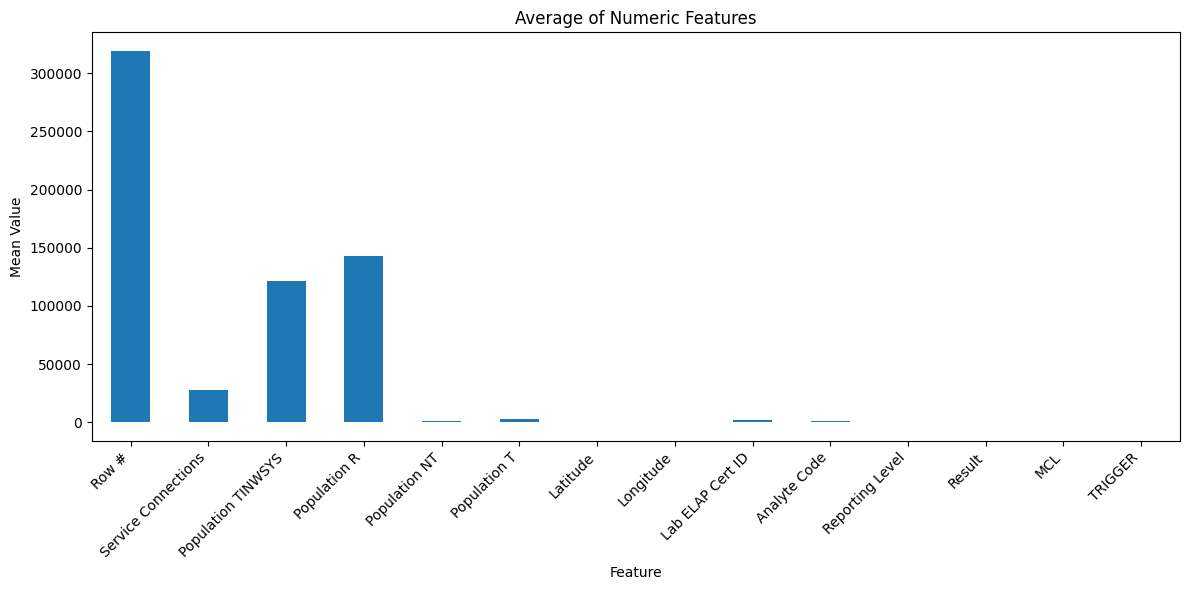

In [ ]:
import matplotlib.pyplot as plt

# --- Step 8: Correlation heatmap (no fignum) ---
corr = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title('Correlation Matrix Heatmap', pad=20)
plt.tight_layout()
plt.show()


# --- Step 10: Bar chart of mean values (instead of boxplots) ---
means = df[numeric_cols].mean()

plt.figure(figsize=(12, 6))
means.plot(kind='bar')
plt.title('Average of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

warnings.filterwarnings("ignore")


df['Collection Date'] = pd.to_datetime(df['Collection Date'], errors='coerce')

# 2. Time series: monthly mean of the radiological Result
ts = (
    df.dropna(subset=['Collection Date', 'Result'])
      .set_index('Collection Date')['Result']
      .resample('M').mean()
      .fillna(method='ffill')
)

# 3. Fit ARIMA(1,1,1) and SARIMA(1,1,1)x(1,1,1,12)
arima = ARIMA(ts, order=(1,1,1)).fit()
sarima = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
print("ARIMA AIC:", arima.aic)
print("SARIMA AIC:", sarima.aic)


# 4. Prepare classification target
df_clf = df.dropna(subset=['Result', 'MCL']).copy()
df_clf['exceed'] = (df_clf['Result'] > df_clf['MCL']).astype(int)

# 5. Define features (drop Result & MCL to avoid leakage)
clf_numeric = [c for c in numeric_cols if c not in ('Result','MCL')]
X = df_clf[clf_numeric + ['County']]
y = df_clf['exceed']

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 7. Preprocessing pipelines
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preproc = ColumnTransformer([
    ('num', num_pipe, clf_numeric),
    ('cat', cat_pipe, ['County'])
])

# 8. Random Forest
rf = Pipeline([('prep', preproc),
               ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]
print("RF  Accuracy:", accuracy_score(y_test, rf_pred))
print("RF  ROC AUC:", roc_auc_score(y_test, rf_proba))

# 9. XGBoost
xgb = Pipeline([('prep', preproc),
                ('clf', XGBClassifier(use_label_encoder=False,
                                      eval_metric='logloss',
                                      random_state=42))])
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]
print("XGB Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGB ROC AUC:", roc_auc_score(y_test, xgb_proba))

ARIMA AIC: 644.3767012470389
SARIMA AIC: 529.0829153055713
RF  Accuracy: 0.9272739196012854
RF  ROC AUC: 0.972033664619002
XGB Accuracy: 0.870365269853761
XGB ROC AUC: 0.9404213221840717


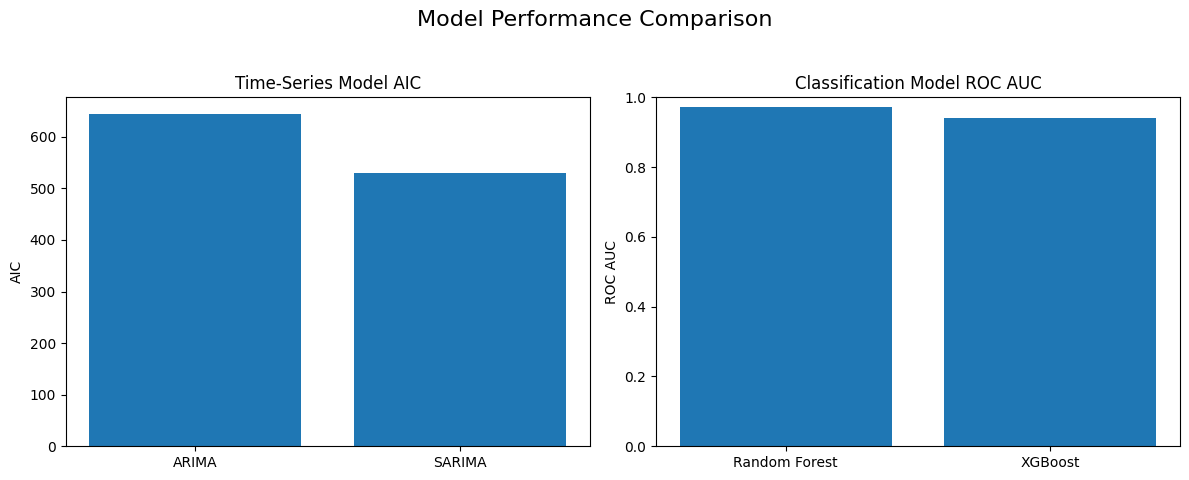

In [ ]:
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore")



# 1. Ensure date parsing
df['Collection Date'] = pd.to_datetime(df['Collection Date'], errors='coerce')

# 2. Time-series data prep
ts = (
    df.dropna(subset=['Collection Date', 'Result'])
      .set_index('Collection Date')['Result']
      .resample('M').mean()
      .fillna(method='ffill')
)

# 3. Fit ARIMA & SARIMA
arima_res = ARIMA(ts, order=(1,1,1)).fit()
sarima_res = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# 4. Classification prep
df_clf = df.dropna(subset=['Result', 'MCL']).copy()
df_clf['exceed'] = (df_clf['Result'] > df_clf['MCL']).astype(int)

# Define features
clf_numeric = [c for c in numeric_cols if c not in ('Result', 'MCL')]
X = df_clf[clf_numeric + ['County']]
y = df_clf['exceed']

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# 6. Preprocessing pipelines
num_pipe = Pipeline([('imp', SimpleImputer(strategy='median')), ('sc', StandardScaler())])
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='constant', fill_value='Missing')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])
preproc = ColumnTransformer([('num', num_pipe, clf_numeric), ('cat', cat_pipe, ['County'])])

# 7. Fit classifiers
rf_pipe = Pipeline([('pre', preproc), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])
xgb_pipe = Pipeline([('pre', preproc), ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

rf_pipe.fit(X_train, y_train)
xgb_pipe.fit(X_train, y_train)

rf_proba = rf_pipe.predict_proba(X_test)[:, 1]
xgb_proba = xgb_pipe.predict_proba(X_test)[:, 1]

# 8. Collect metrics
aic_arima  = arima_res.aic
aic_sarima = sarima_res.aic
auc_rf     = roc_auc_score(y_test, rf_proba)
auc_xgb    = roc_auc_score(y_test, xgb_proba)

# 9. Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['ARIMA','SARIMA'], [aic_arima, aic_sarima])
axes[0].set_title('Time-Series Model AIC')
axes[0].set_ylabel('AIC')

axes[1].bar(['Random Forest','XGBoost'], [auc_rf, auc_xgb])
axes[1].set_title('Classification Model ROC AUC')
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('ROC AUC')

plt.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

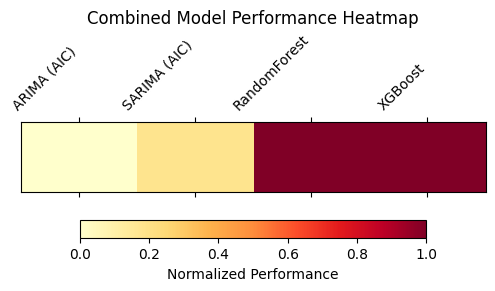

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Gather raw metrics
metrics = pd.Series({
    'ARIMA (AIC)':   aic_arima,      # lower is better
    'SARIMA (AIC)':  aic_sarima,
    'RandomForest':  auc_rf,         # higher is better
    'XGBoost':       auc_xgb
})

# 2. Flip the AIC metrics so “higher is better”
metrics['ARIMA (AIC)']  = -metrics['ARIMA (AIC)']
metrics['SARIMA (AIC)'] = -metrics['SARIMA (AIC)']

# 3. Normalize to [0,1]
norm = (metrics - metrics.min()) / (metrics.max() - metrics.min())

# 4. Plot heatmap
fig, ax = plt.subplots(figsize=(6,1.5))
cax = ax.matshow([norm.values], aspect='auto', cmap='YlOrRd')
ax.set_xticks(range(len(norm)))
ax.set_xticklabels(norm.index, rotation=45, ha='right')
ax.set_yticks([])  # no y-axis needed
fig.colorbar(cax, orientation='horizontal', pad=0.25, label='Normalized Performance')
plt.title('Combined Model Performance Heatmap')
plt.tight_layout()
plt.show()